<a href="https://colab.research.google.com/github/dovahkiin0022/dummy_group_repositiory/blob/data-visualization/group_project_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('/content/hw5-iron-alloy.csv')

In [85]:
def parse_range(value):
    """Cleans up two problems with this DataFrame:
    (1) NaN values should be 0 for compositions
    (2) Ranges with scalars separated by "to"
    """
    try:
        return float(value)
    except:
        pass
    if type(value) is str and 'to' in value:
        lo, hi = [float(it) for it in value.split('to')]
        return float(0.5 * (lo + hi))

def cleanup_column(column):
    try:
        return column.astype(float)
    except:
        pass
    return [parse_range(it) for it in column.values]

# for column in df.columns:
#     column = cleanup_column(df.iloc[:, 1])

In [86]:
for columns in df.columns:
    if df[columns].dtypes == object:
        try:
            c = cleanup_column(df[columns])
            df[columns] = c
        except:
            pass

In [87]:
missing_values = df.isnull().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

Sulfur (S)S                                         0.001536
Phosphorus (P)P                                     0.001536
Tensile Strength: Ultimate (UTS)                    0.002304
Strength to Weight: Axial                           0.002304
Strength to Weight: Bending                         0.002304
Thermal Shock Resistance                            0.002304
Carbon (C)C                                         0.006912
Manganese (Mn)Mn                                    0.008449
Thermal Conductivity                                0.046083
Thermal Diffusivity                                 0.046083
Silicon (Si)Si                                      0.061444
Electrical Conductivity: Equal Volume               0.084485
Electrical Conductivity: Equal Weight (Specific)    0.084485
Maximum Temperature: Mechanical                     0.139785
Elongation at Break                                 0.155146
Chromium (Cr)Cr                                     0.174347
Tensile Strength: Yield 

In [88]:
# Now lets create a pandas dataframe of above result:

missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values

,count
Name,
Sulfur (S)S,0.001536
Phosphorus (P)P,0.001536
Tensile Strength: Ultimate (UTS),0.002304
Strength to Weight: Axial,0.002304
Strength to Weight: Bending,0.002304
Thermal Shock Resistance,0.002304
Carbon (C)C,0.006912
Manganese (Mn)Mn,0.008449
Thermal Conductivity,0.046083


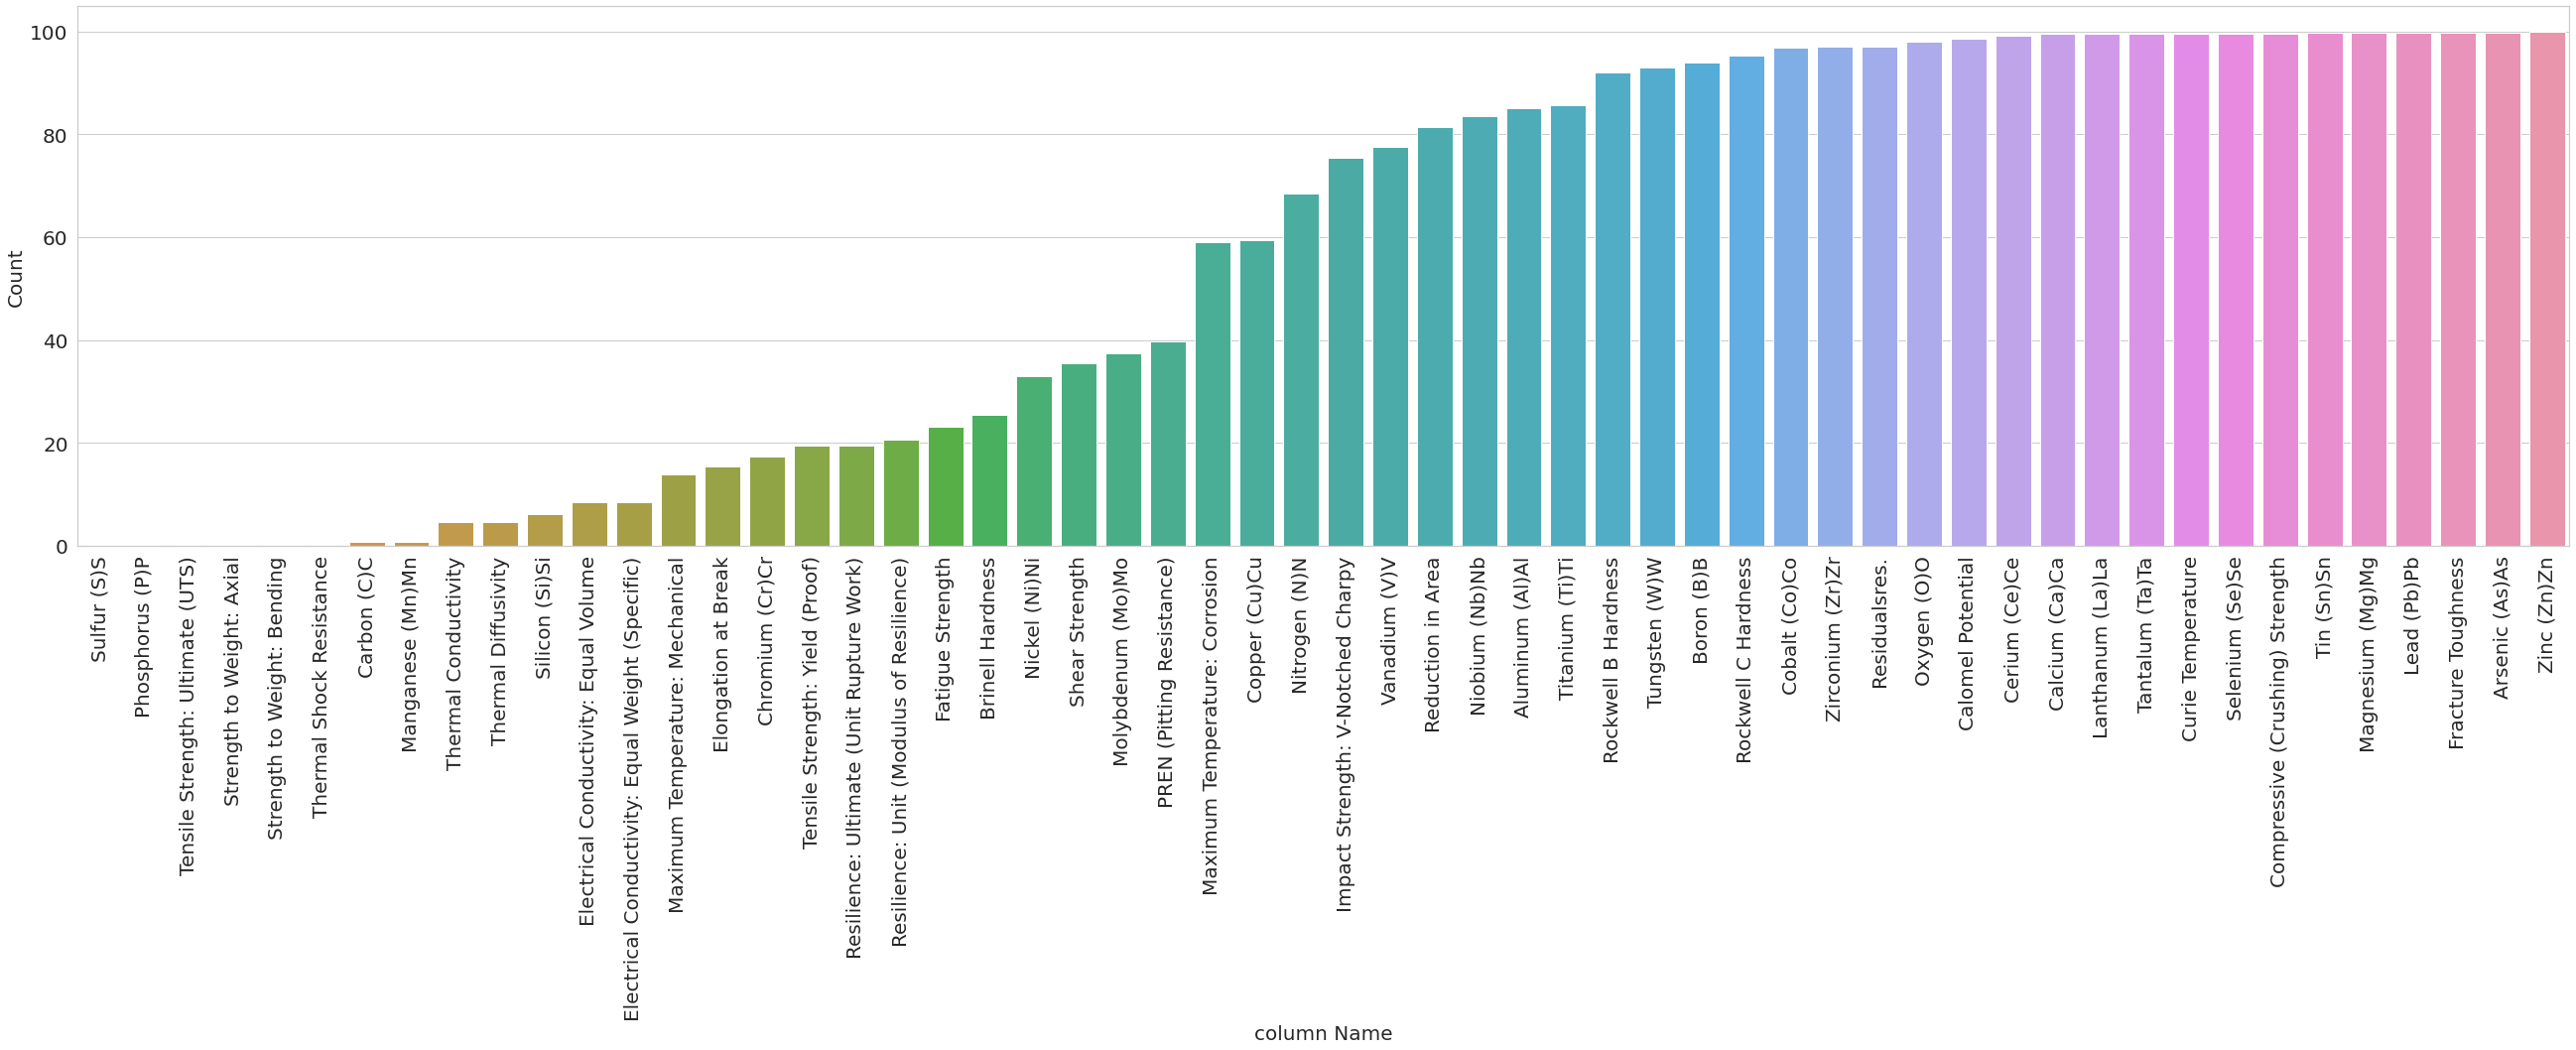

In [89]:
#plot percentage of missing values for each columns
import seaborn as sns
plt.figure(figsize=(45,10))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = missing_values.index, y = 'count', data=missing_values*100)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('column Name', fontsize=20)
plt.show()

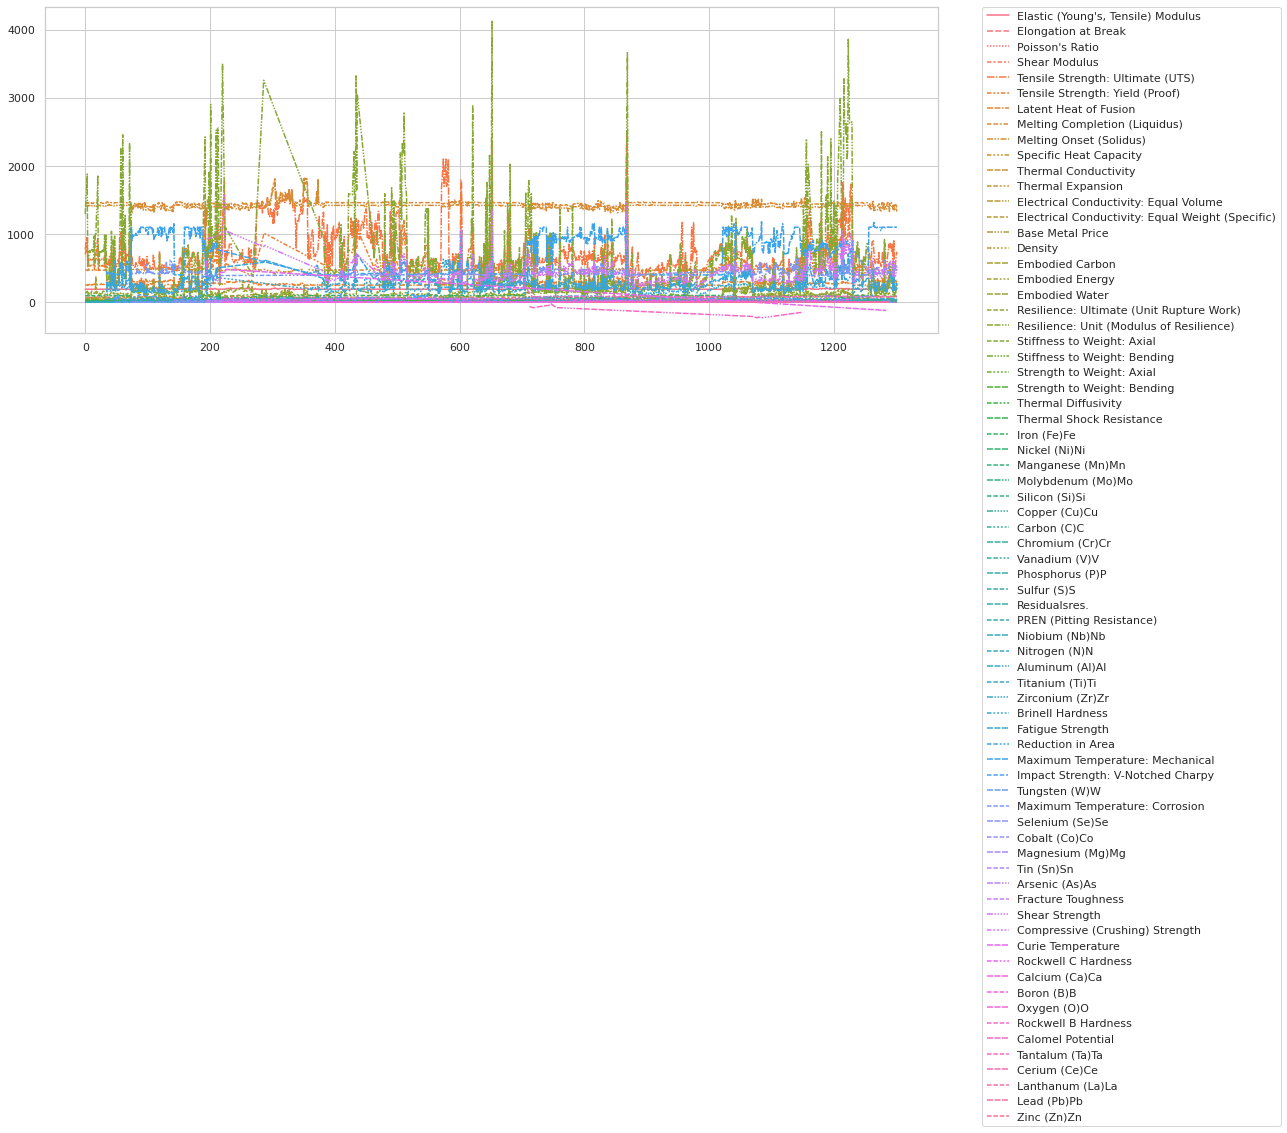

In [90]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [91]:
#coorelation heatmap
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

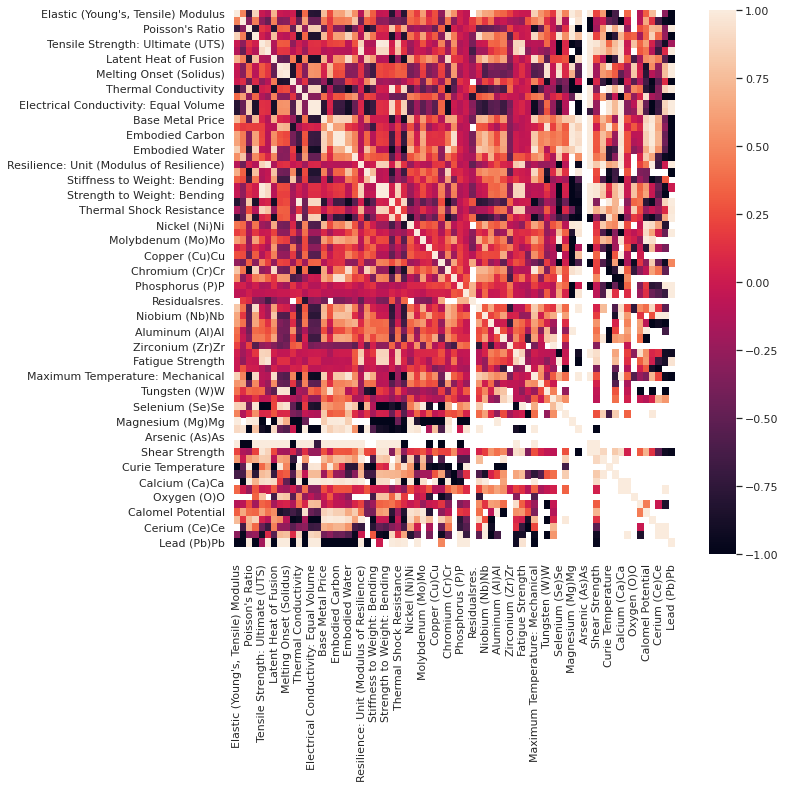

In [92]:
corr = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

In [93]:
print (corr['Tensile Strength: Ultimate (UTS)'].sort_values(ascending=False)[:10]) #top 10 correlations
print (corr['Tensile Strength: Ultimate (UTS)'].sort_values(ascending=False)[-5:]) #least 5 correlations

Fracture Toughness                  1.000000
Tensile Strength: Ultimate (UTS)    1.000000
Strength to Weight: Axial           0.996438
Strength to Weight: Bending         0.987428
Shear Strength                      0.967805
Calcium (Ca)Ca                      0.919174
Tensile Strength: Yield (Proof)     0.907962
Fatigue Strength                    0.895975
Thermal Shock Resistance            0.881634
Brinell Hardness                    0.875460
Name: Tensile Strength: Ultimate (UTS), dtype: float64
Lanthanum (La)La   -0.896560
Selenium (Se)Se    -0.993163
Magnesium (Mg)Mg   -0.997484
Arsenic (As)As           NaN
Zinc (Zn)Zn              NaN
Name: Tensile Strength: Ultimate (UTS), dtype: float64


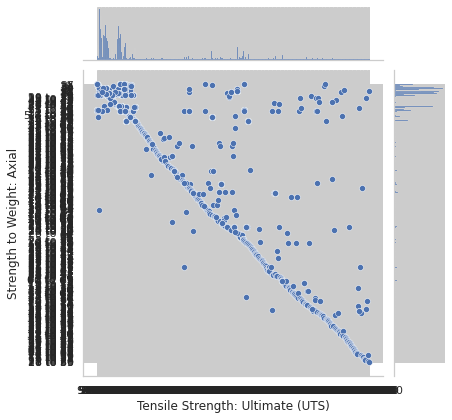

In [96]:
sns.jointplot(x=df_train['Tensile Strength: Ultimate (UTS)'], y=df_train['Strength to Weight: Axial']) #exploring outliers

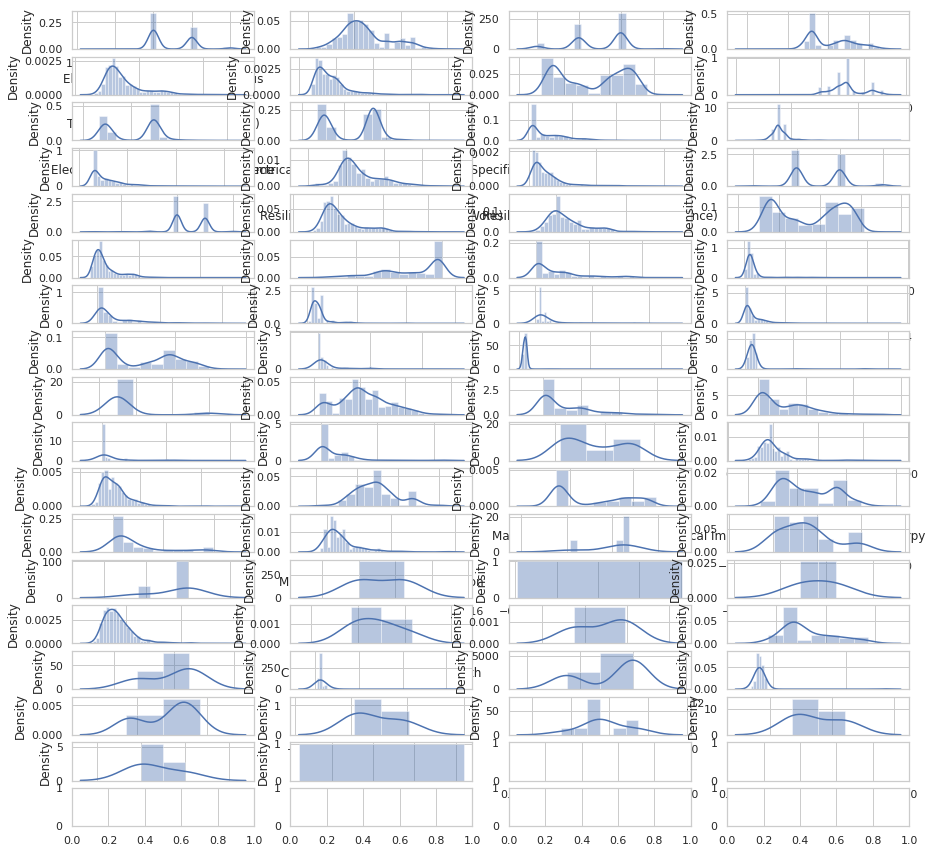

In [99]:
import matplotlib.pyplot as plt
# Create the subplots
fig, axes = plt.subplots(18,4,figsize=(10,10))
fig.set_size_inches(15, 15)

n_cols=4
for i, column in enumerate(df.select_dtypes(include=[np.float])):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols])

In [100]:
df.skew()
df.kurtosis()

Elastic (Young's, Tensile) Modulus   -0.212637
Elongation at Break                   0.025998
Poisson's Ratio                      -0.351006
Shear Modulus                        -0.840902
Tensile Strength: Ultimate (UTS)      2.959957
                                        ...   
Tantalum (Ta)Ta                      -2.417628
Cerium (Ce)Ce                         0.393803
Lanthanum (La)La                     -3.149096
Lead (Pb)Pb                                NaN
Zinc (Zn)Zn                                NaN
Length: 72, dtype: float64

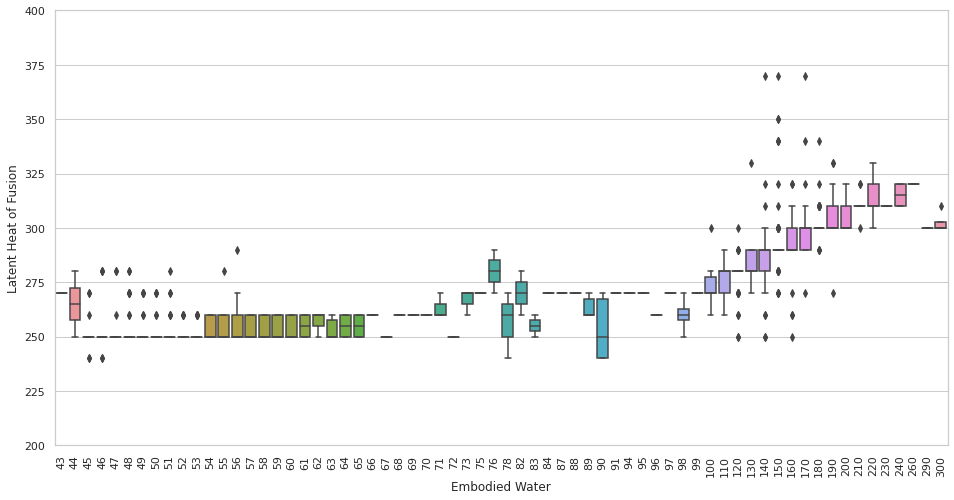

In [101]:
var = 'Embodied Water'
data = pd.concat([df_train['Latent Heat of Fusion'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Latent Heat of Fusion", data=data)
fig.axis(ymin=200, ymax=400);
plt.xticks(rotation=90);